(6509, 5781, 3)
(3, 64, 64, 9090)


TypeError: Invalid shape (64, 64, 9090) for image data

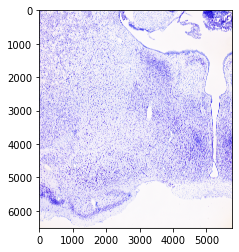

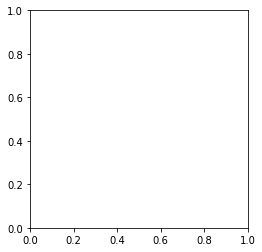

In [9]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

filename = '/home/jperez/data/alexbrain/test/ff_images/lvl21.png'

dim = 64
skip = 64

im = np.array(Image.open(filename))
print(im.shape)

v = np.lib.stride_tricks.sliding_window_view(im, (dim, dim, 3))[::skip, ::skip][:, :, 0].reshape((-1, dim, dim, 3))
print(v.shape)

plt.imshow(im)

plt.figure()
plt.imshow(v[0]);

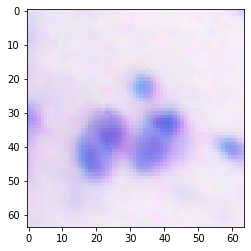

In [11]:
plt.imshow(np.load('/home/jperez/data/alexbrain/train/ff_images/lvl21_1_slice_0.npy').T)

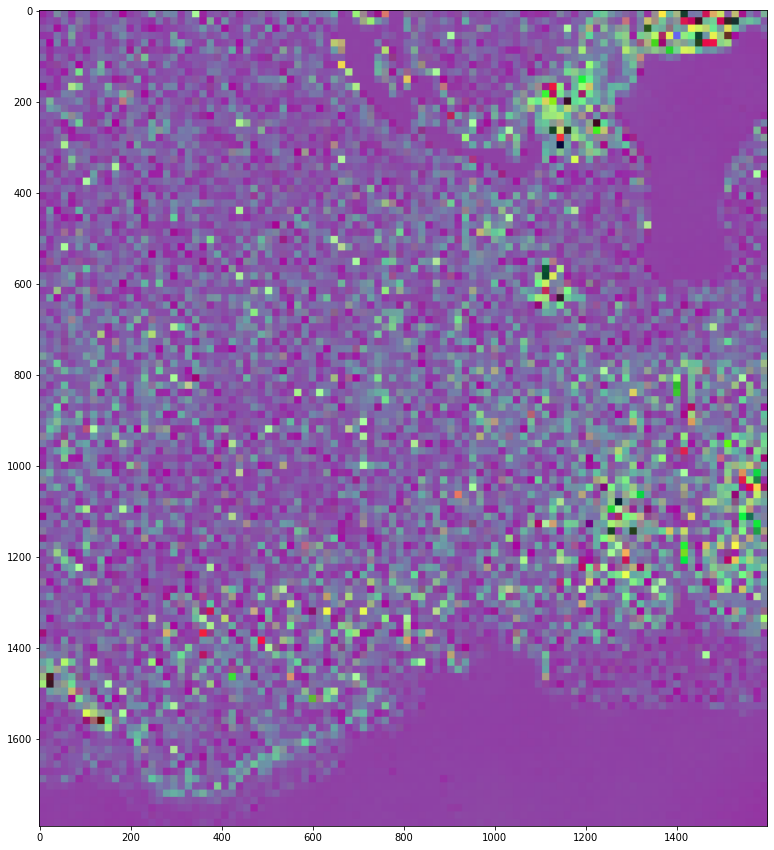

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

h1 = np.array(Image.open('/home/jperez/programming/dino/runs/vit_tiny_16/visual/train_lvl21_1/attn-head0.png'))
h2 = np.array(Image.open('/home/jperez/programming/dino/runs/vit_tiny_16/visual/train_lvl21_1/attn-head1.png'))
h3 = np.array(Image.open('/home/jperez/programming/dino/runs/vit_tiny_16/visual/train_lvl21_1/attn-head2.png'))

t = h1+h2+h3
plt.figure(figsize=(15, 15))
plt.imshow(t, cmap='gray')

# CUDA_VISIBLE_DEVICES=0 python visualize_attention.py --arch vit_tiny --patch_size 16 --image_path /home/jperez/data/alexbrain/train/ff_images/lvl21_1.png --output_dir runs/vit_tiny_16/visual/train_lvl21_1 --pretrained_weights runs/vit_tiny_16/checkpoint.pth --image_size 1600

# CUDA_VISIBLE_DEVICES=0 python main_dino.py --batch_size_per_gpu 4 --arch vit_tiny --data_path /home/jperez/data/alexbrain/train/ff_images --output_dir runs/vit_tiny_16


In [3]:
!python visualize_attention.py --arch vit_tiny --patch_size 16 \
    --image_path /home/jperez/data/alexbrain/train/ff_images_64/lvl21_1_slice_5.npy \
    --output_dir runs/data64_vit_tiny_16_out100/visual/ \
    --pretrained_weights runs/data64_vit_tiny_16_out100/checkpoint.pth \
    --image_size 512 \
    --threshold 0.1

Take key teacher in provided checkpoint dict
Pretrained weights found at runs/data64_vit_tiny_16_out100/checkpoint.pth and loaded with msg: _IncompatibleKeys(missing_keys=[], unexpected_keys=['head.mlp.0.weight', 'head.mlp.0.bias', 'head.mlp.2.weight', 'head.mlp.2.bias', 'head.mlp.4.weight', 'head.mlp.4.bias', 'head.last_layer.weight_g', 'head.last_layer.weight_v'])
/home/jperez/miniconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:3635: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
/home/jperez/miniconda3/envs/pytorch/lib/python3.7/site-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses

(512, 512, 3)


Text(0.5, 1.0, 'ViT Head2')

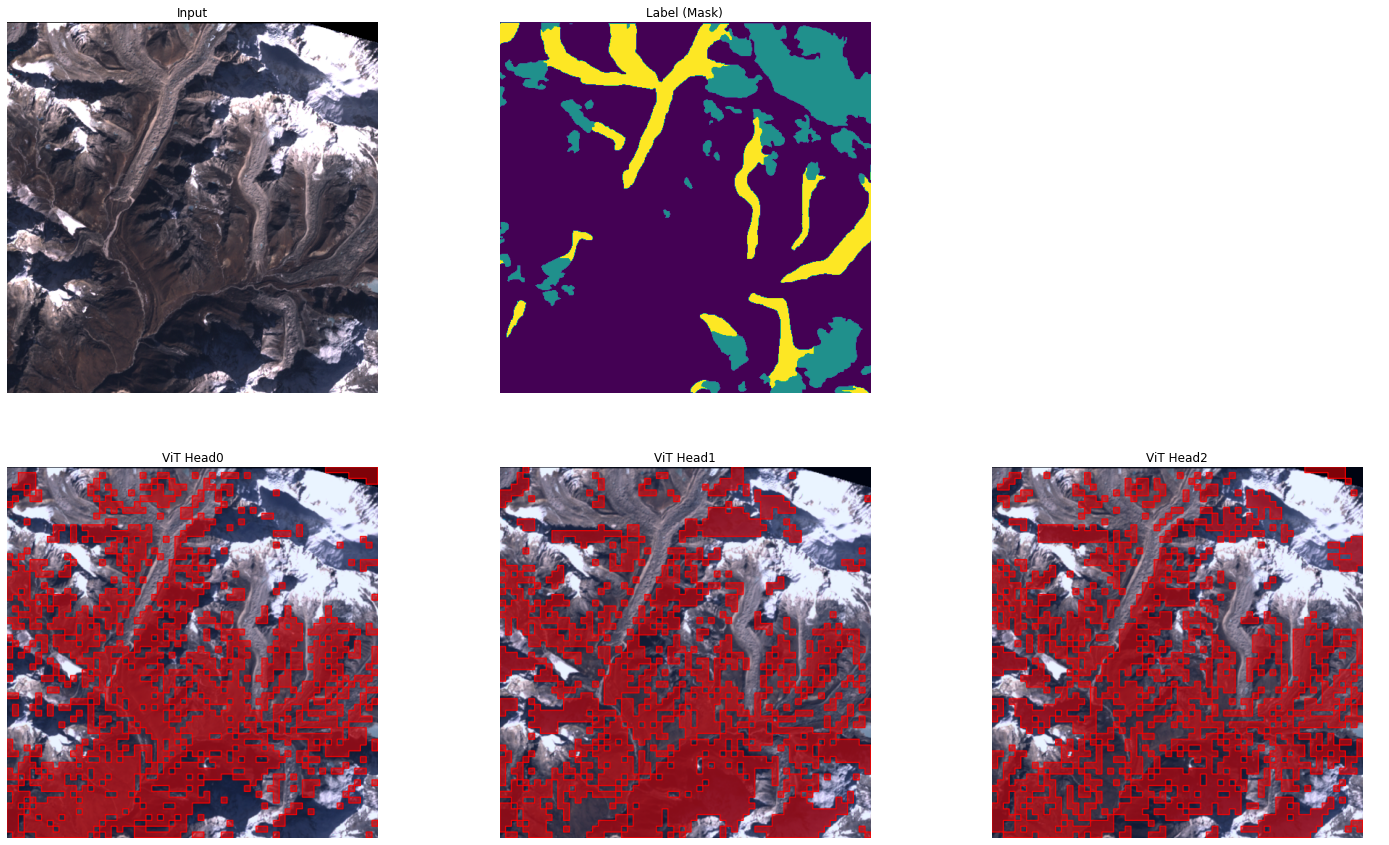

In [18]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

path = '/home/jperez/data/HKH/processed_L07_2005/train/tiff_140_slice_1.npy'
im = np.load(path)[:, :, [2,1,0]].astype(np.uint8)
mask = np.load(path.replace('tiff', 'mask'))

# d_path = pathlib.Path('/home/jperez/programming/dino/runs/glacial_c457_vit_tiny_16/visual/')

channels = [0,1,2,3,4,5,6,7,8]
d_path = pathlib.Path(f'/home/jperez/programming/dino/runs/glacial_c{"".join([str(x) for x in channels])}_vit_tiny_16/visual/')
th = '0.4'
head0 = Image.open(d_path / f'mask_th{th}_head0.png')
head1 = Image.open(d_path / f'mask_th{th}_head1.png')
head2 = Image.open(d_path / f'mask_th{th}_head2.png')

print(im.shape)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        dax: plt.Axes = ax[i,j]
        dax.set_axis_off()

ax[0, 0].imshow(im)
ax[0, 0].set_title('Input')

ax[0, 1].imshow(mask)
ax[0, 1].set_title('Label (Mask)')

ax[1, 0].imshow(head0)
ax[1, 0].set_title('ViT Head0')

ax[1, 1].imshow(head1)
ax[1, 1].set_title('ViT Head1')

ax[1, 2].imshow(head2)
ax[1, 2].set_title('ViT Head2')

(512, 512) uint8 0 255


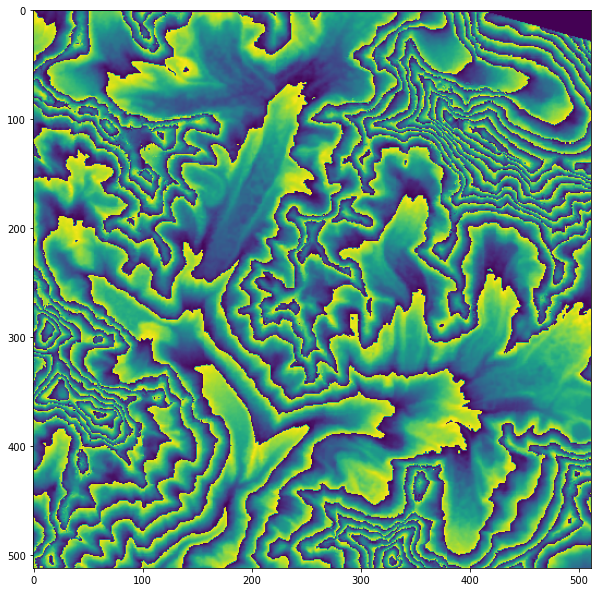

In [60]:
# plt.tight_layout()
path = '/home/jperez/data/HKH/processed_L07_2005/train/tiff_140_slice_1.npy'
arr = np.load(path)[:, :, 9].astype(np.uint8)
plt.figure(figsize=(10, 15))
print(arr.shape, arr.dtype, arr.min(), arr.max())
plt.imshow(arr)